In [1]:
% matplotlib inline

from collections import defaultdict
import datetime as dt

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# Load the data from the previous lab
# If you changed the name you'll need to edit the next line
iowasales = pd.read_csv('iowasales.csv')


# Convert dates
iowasales['Date']=pd.to_datetime(iowasales['Date'], infer_datetime_format=True)
iowasales.head()

/Users/kainguyen/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Date,Store Number,City,Zip Code,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margins,Price/Liter
0,2663461,2015-01-08,2106,CEDAR FALLS,50613,CANADIAN WHISKIES,260,11296,Crown Royal,750,15.00,22.50,12,270.00,9.00,2.38,7.50,30.000000
1,2663468,2015-01-08,2106,CEDAR FALLS,50613,SINGLE MALT SCOTCH,420,5133,Glenmorangie 10 Yr Single Malt Scotch,750,22.99,34.49,1,34.49,0.75,0.20,11.50,45.986667
2,2663551,2015-01-08,2106,CEDAR FALLS,50613,CANADIAN WHISKIES,115,10550,Black Velvet Toasted Caramel,750,6.75,10.13,12,121.56,9.00,2.38,3.38,13.506667
3,2663731,2015-01-08,2106,CEDAR FALLS,50613,AMERICAN DRY GINS,55,29287,Barton Gin,1000,3.92,5.88,12,70.56,12.00,3.17,1.96,5.880000
4,2663758,2015-01-08,2106,CEDAR FALLS,50613,CANADIAN WHISKIES,260,10808,Crown Royal Regal Apple,1000,18.50,27.75,36,999.00,36.00,9.51,9.25,27.750000


In [8]:
iowapiv = pd.read_csv('iowapiv.csv')
iowapiv.head()

,Store Number,Sale (Dollars)
0,2106,1772173.90
1,2113,107500.05
2,2130,1415127.26
3,2152,85832.60
4,2178,336927.86


In [4]:
iowasales.columns

Index([u'Unnamed: 0', u'Date', u'Store Number', u'City', u'Zip Code',
       u'Category Name', u'Vendor Number', u'Item Number', u'Item Description',
       u'Bottle Volume (ml)', u'State Bottle Cost', u'State Bottle Retail',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)', u'Margins', u'Price/Liter'],
      dtype='object')

In [16]:
iowapiv.dtypes

Store Number       object
Sale (Dollars)    float64
dtype: object

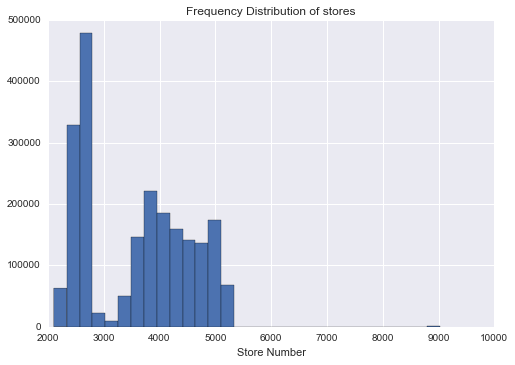

In [5]:
plt.hist(iowasales['Store Number'], bins=30)
plt.xlabel('Store Number')
plt.title('Frequency Distribution of stores')
plt.show()

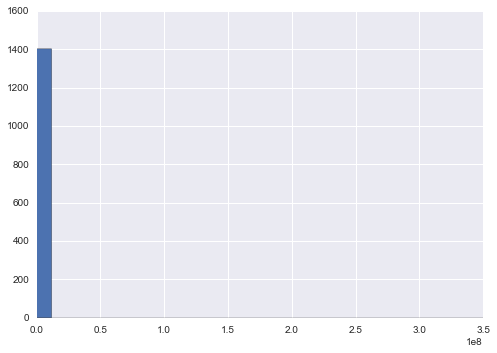

In [22]:
plt.hist(iowapiv['Sale (Dollars)'], bins=30)
plt.show()

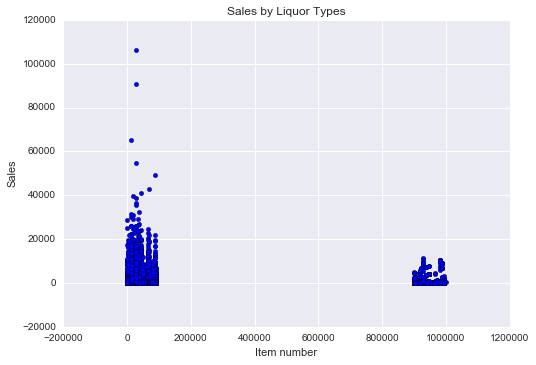

In [12]:
plt.scatter(x=iowasales['Item Number'], y=iowasales['Sale (Dollars)'])
plt.xlabel('Item number')
plt.ylabel('Sales')
plt.title('Sales by Liquor Types')
plt.show()

LinregressResult(slope=-0.0074652769290121023, intercept=156.87291396771542, rvalue=-0.017372590583067365, pvalue=2.0268353011794583e-145, stderr=0.00029069774018205917)


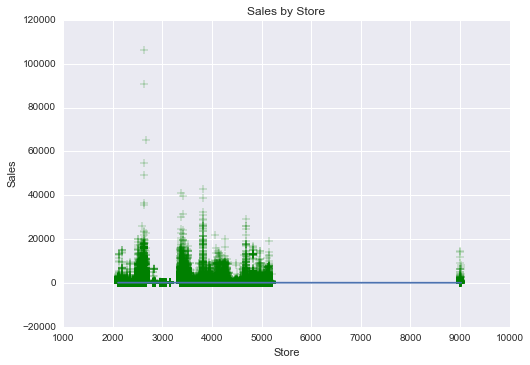

In [7]:
from scipy.stats import linregress
plt.scatter(x=iowasales['Store Number'], y=iowasales['Sale (Dollars)'], color='g', s=80, marker="+")
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Sales by Store')
plt.plot(iowasales['Store Number'], np.poly1d(np.polyfit(iowasales['Store Number'], iowasales['Sale (Dollars)'], 1))(iowasales['Store Number']))
fit = np.polyfit(iowasales['Store Number'],iowasales['Sale (Dollars)'],1)
fit_fn = np.poly1d(fit)
print linregress(iowasales['Store Number'],iowasales['Sale (Dollars)'])
plt.show()